<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/01%20HW/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 MRI and MRII Algorithms Explained

### 🎯 What Are MRI and MRII?

MRI (Modified Regularized Incremental) and MRII (Modified Regularized Incremental Improved) are enhanced learning algorithms for training neural networks. They are especially useful for:

- Faster convergence  
- Reducing overfitting  
- Handling noisy or streaming data

---

## 🔹 MRI: Modified Regularized Incremental Algorithm

### ✅ Concept

MRI is a variation of the incremental learning algorithm that includes **regularization** to prevent overfitting.

### ✅ Key Steps:

1. Start with random weights  
2. Process training data one by one or in small batches  
3. Compute prediction and error  
4. Update weights using gradient descent **with regularization**

### ✅ Cost Function:

$$
E(w) = \frac{1}{2}(y - \hat{y})^2 + \frac{\lambda}{2} \sum w^2
$$

### ✅ Weight Update Rule:

$$
w^{(t+1)} = w^{(t)} + \eta \cdot (y - \hat{y}) \cdot x - \eta \cdot \lambda \cdot w^{(t)}
$$

Where:  
- \( \eta \): learning rate  
- \( \lambda \): regularization coefficient  

---

## 🔹 MRII: Modified Regularized Incremental with Improvement

### ✅ Motivation

MRI does not use momentum or adaptive learning rate.  
MRII improves upon MRI by including:

- **Momentum**  
- **Adaptive learning rate**

### ✅ Update Formula:

$$
w^{(t+1)} = w^{(t)} - \eta_t \cdot \left( \nabla E(w^{(t)}) + \lambda \cdot w^{(t)} \right) + \alpha \cdot \Delta w^{(t-1)}
$$

Where:  
- \( \eta_t \): time-dependent learning rate  
- \( \alpha \): momentum coefficient (e.g., 0.9)  
- \( \Delta w^{(t-1)} \): previous weight update  

---

## 📊 Comparison Table

| Feature                 | MRI       | MRII      |
|------------------------|-----------|-----------|
| Incremental Learning   | ✅        | ✅        |
| Regularization         | ✅        | ✅        |
| Momentum               | ❌        | ✅        |
| Adaptive Learning Rate | ❌        | ✅        |
| Convergence Speed      | Moderate  | Faster    |
| Overfitting Risk       | Low       | Lower     |
| Complexity             | Simpler   | Advanced  |

---

## 🧪 Summary

- **MRI** adds regularization to standard incremental learning.  
- **MRII** improves MRI by using momentum and adaptive learning rate.  
- Both aim to improve generalization and learning efficiency.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving MadaLine.csv to MadaLine.csv


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
column_names = ['A', 'B', 'C']
df = pd.read_csv('/content/MadaLine.csv', header=None, names=column_names)

In [5]:
df.head(5)

,A,B,C
0,-0.642823,0.720606,0.0
1,-0.218126,0.677263,0.0
2,-0.582930,-0.347496,0.0
3,0.285127,0.091750,0.0
4,-0.335577,-0.313893,0.0


In [6]:
df.tail(5)

,A,B,C
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0
199,-1.246702,-0.388615,1.0


In [7]:
df.describe()

,A,B,C
count,200.000000,200.000000,200.000000
mean,-0.085698,0.076245,0.500000
std,0.786895,0.794322,0.501255
min,-1.577264,-1.509812,0.000000
25%,-0.668531,-0.459871,0.000000
50%,-0.138585,0.072525,0.500000
75%,0.496490,0.679909,1.000000
max,1.541327,1.530069,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       200 non-null    float64
 1   B       200 non-null    float64
 2   C       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [9]:
df.dtypes

,0
A,float64
B,float64
C,float64


In [10]:
df.isnull().sum()

,0
A,0
B,0
C,0


In [11]:
df['C'].value_counts()

,count
C,
0.0,100
1.0,100


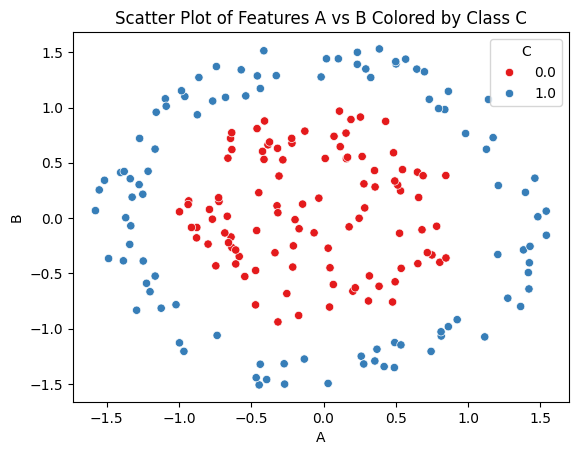

In [12]:
sns.scatterplot(data=df, x='A', y='B', hue='C', palette='Set1')
plt.title('Scatter Plot of Features A vs B Colored by Class C')
plt.show()

In [53]:
class Madaline:
    def __init__(self, num_of_neurons, n_epoch=500, learning_rate=0.1):
        self.n_epoch = n_epoch
        self.learning_rate = learning_rate

        np.random.seed(42)
        self.weights = np.random.rand(num_of_neurons, 2)
        self.v = [1] * num_of_neurons
        self.b1 = np.random.rand(num_of_neurons, 1)
        self.b2 = num_of_neurons - 1


    def fit(self, X, y):
        count = 0
        self.cost_ = []
        for epoc in range(self.n_epoch):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, y):
                z_in = np.matmul(x, self.weights.T) + self.b1.squeeze()   # output of neurons in hidden layer
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2  # output neuron
                y_pred = np.heaviside(y_in, 1) * 2 - 1

                if y_pred != label:
                    if label == 1:
                        z_max = max(z_in)
                        ind = np.where(z_in == z_max)
                        self.weights[ind, :] += self.learning_rate * (label - z_in[ind]) * np.array(x)  # update weights of neoron that had maximum output
                        self.b1[ind] += self.learning_rate * (label - z_in[ind])    # update bias of neoron that had maximum output

                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] += self.learning_rate * (label - z_in[indice]) * np.array(x)
                            self.b1[indice] += self.learning_rate * (label - z_in[indice])

            self.cost_.append(self.error(self.predict(X), y))   # append error in cost list

            if np.all((self.weights - old_weights) < 0.0001) and epoc > 10:
                count += 1
            else:
                count = 0
            if count > 10:
                 print("Total iterations with", len(self.b1), "lines:", epoc + 1)
                 break


    def predict(self, X_test):
        y = []
        for x in X_test:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b1
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)

        return y

    def error(self, net, t):
        self.err = ((t-net)**2).sum()/2.
        return self.err



In [30]:
X = df.loc[:, ['A', 'B']].to_numpy()
y = df.loc[:, 'C'].to_numpy().astype(int)

print(f'Shape of input X: {X.shape}')
print(f'Shape of output y: {y.shape}')

Shape of input X: (200, 2)
Shape of output y: (200,)


In [31]:
# Change label=0 to label=1
y[y == 0] = -1

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy of prediction (using 3 neurons in hidden layer) is: 0.875
Weights of hidden neurons are: 
 [[-1.83570821 -0.43051278]
 [ 0.36319337  0.56150723]
 [ 0.69640278 -1.13896801]]

Bias of hidden neurons are: 
 [[-1.80669033]
 [-0.42373825]
 [-1.21421332]] 



/tmp/ipython-input-71-1877105829.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-madaline.b1[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")


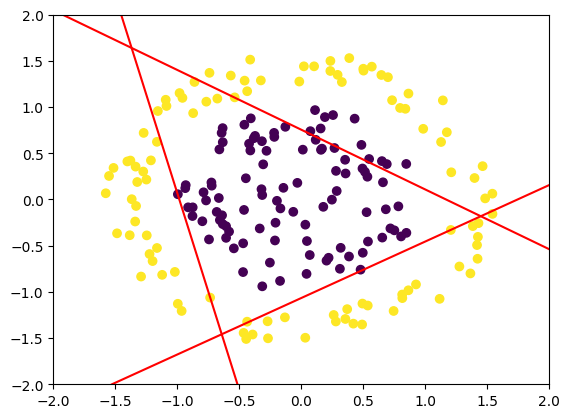

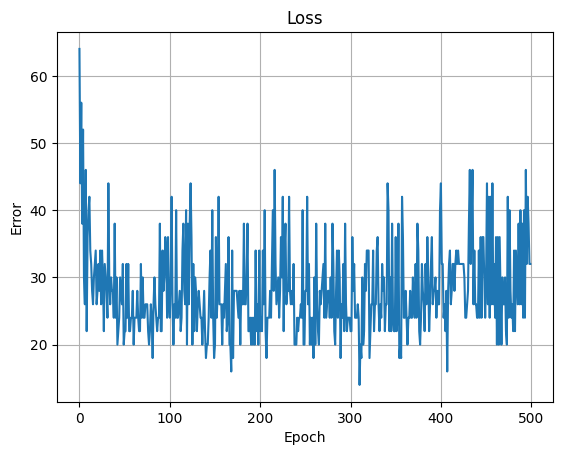

----------------------------------------------------------------------------------------------------
Total iterations with 4 lines: 273
Accuracy of prediction (using 4 neurons in hidden layer) is: 0.975
Weights of hidden neurons are: 
 [[ 0.52435335  0.52643489]
 [ 0.39772463 -0.56153363]
 [-1.89430034 -1.20586585]
 [-0.39025556  0.71080518]]

Bias of hidden neurons are: 
 [[-0.77124174]
 [-0.6589818 ]
 [-2.00296914]
 [-0.8932942 ]] 



/tmp/ipython-input-71-1877105829.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-madaline.b1[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")


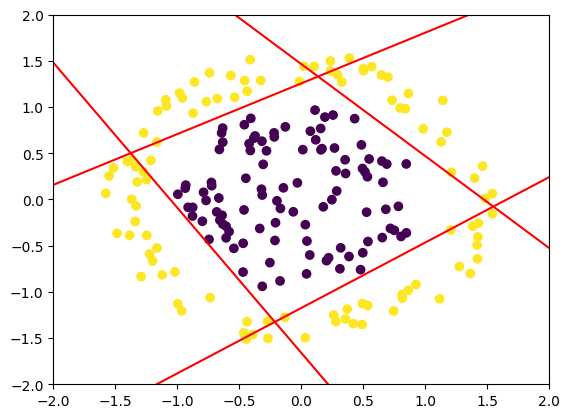

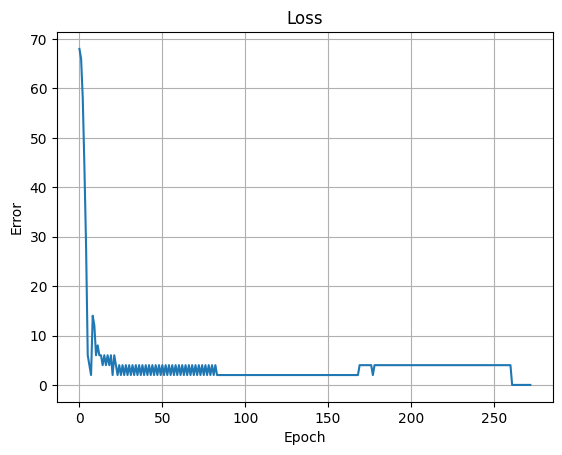

----------------------------------------------------------------------------------------------------
Total iterations with 10 lines: 22
Accuracy of prediction (using 10 neurons in hidden layer) is: 0.975
Weights of hidden neurons are: 
 [[ 0.372263    0.48023349]
 [ 0.35093752  0.42870079]
 [-0.53455097 -0.12572426]
 [ 0.23376171  0.41321924]
 [ 0.39154328  0.50163587]
 [-0.26050107  0.52471652]
 [ 0.55264311  0.07903774]
 [ 0.11950883 -0.29114597]
 [ 0.28657412  0.29633732]
 [ 0.22383728  0.26749755]]

Bias of hidden neurons are: 
 [[-0.75584713]
 [-0.6802729 ]
 [-0.50548895]
 [-0.60717061]
 [-0.63093275]
 [-0.71023993]
 [-0.58732108]
 [-0.30921757]
 [-0.50176771]
 [-0.38831936]] 



/tmp/ipython-input-71-1877105829.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-madaline.b1[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")


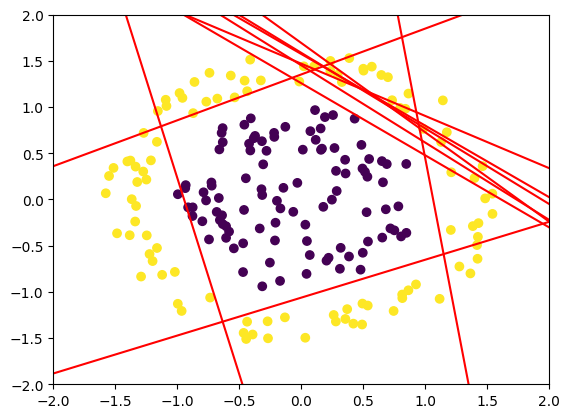

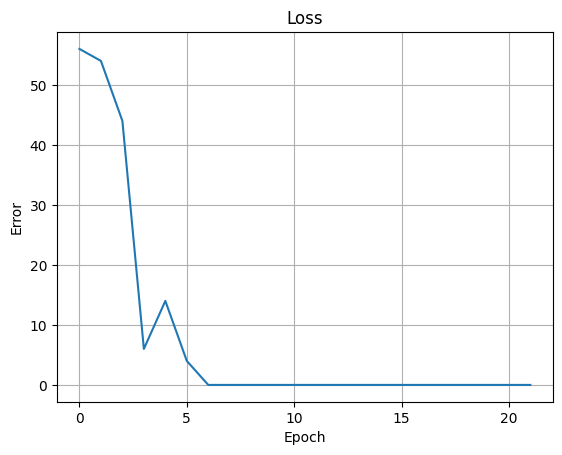

----------------------------------------------------------------------------------------------------


In [71]:
num_hidden_neurons = [3, 4, 10]

for i in range(3):
    madaline = Madaline(num_of_neurons=num_hidden_neurons[i])
    madaline.fit(X=X_train, y=y_train)
    pred = madaline.predict(X_test)

    acc = accuracy_score(y_test, pred)
    print(f"Accuracy of prediction (using {num_hidden_neurons[i]} neurons in hidden layer) is:", acc)
    print(f'Weights of hidden neurons are: \n {madaline.weights}\n')
    print(f'Bias of hidden neurons are: \n {madaline.b1} \n')

#plot lines and errors of madaline models
    for i in range(num_hidden_neurons[i]):
        plt.axline((0, float(-madaline.b1[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")
    plt.scatter(X[:,0], X[:,1], c=y.reshape(-1))
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.show()

    plt.plot(madaline.cost_)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

    print('-' * 100)